In [1]:
from os.path import exists
from os import mkdir
import kaggle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans

# Load Dataset

In [2]:
# Make sure datasets directory exists
if not exists('../datasets'):
    mkdir('../datasets')

# Download dataset
dataset_path = '../datasets/wine'
if not exists(dataset_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('harrywang/wine-dataset-for-clustering', '../datasets/wine', unzip=True)

In [3]:
# Load dataset
df = pd.read_csv(dataset_path + '/wine-clustering.csv')

print(df.columns.values)

['Alcohol' 'Malic_Acid' 'Ash' 'Ash_Alcanity' 'Magnesium' 'Total_Phenols'
 'Flavanoids' 'Nonflavanoid_Phenols' 'Proanthocyanins' 'Color_Intensity'
 'Hue' 'OD280' 'Proline']


# Principal Component Analysis

In [4]:
# Scale data befor applying PCA
scaling = StandardScaler()
scaling.fit(df)
scaled_data = scaling.transform(df)

# Run PCA
num_components = min(df.shape)
principal = PCA(n_components=num_components)
principal.fit(scaled_data)
x = principal.transform(scaled_data)
x = pd.DataFrame(x, columns=[f'PC{i+1}' for i in range(num_components)])

# Check the dimensions of data after PCA
print(x.shape)

(178, 13)


Select a target and run the below cells to see visualization

`OD280` and `Flavanoids` have good clustering

In [11]:
print(' | '.join(df.columns.values))
target = 'OD280'

Alcohol | Malic_Acid | Ash | Ash_Alcanity | Magnesium | Total_Phenols | Flavanoids | Nonflavanoid_Phenols | Proanthocyanins | Color_Intensity | Hue | OD280 | Proline


Text(0, 0.5, 'PC2')

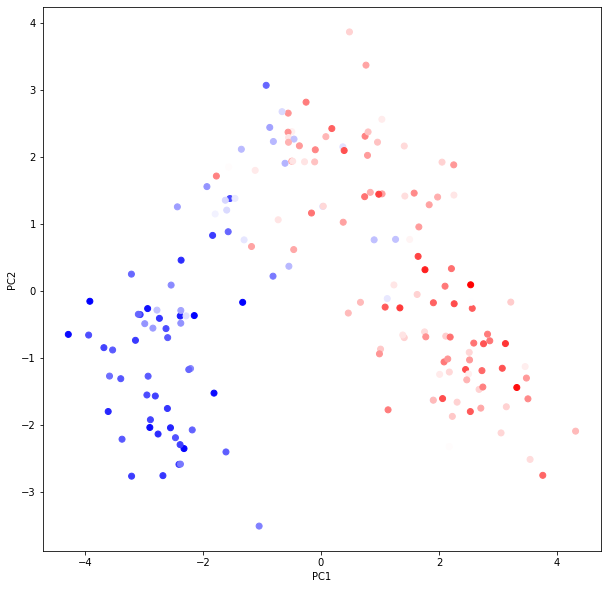

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(x['PC1'], x['PC2'], c=df[target], cmap='bwr')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0.5, 0, 'PC3')

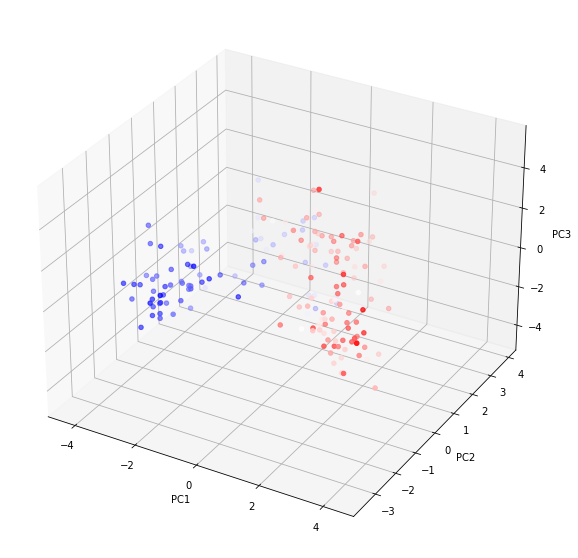

In [13]:
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x['PC1'], x['PC2'], x['PC3'], c=df[target], cmap='bwr')
axis.set_xlabel('PC1', fontsize=10)
axis.set_ylabel('PC2', fontsize=10)
axis.set_zlabel('PC3', fontsize=10)

Text(0, 0.5, 'Variance Ratio (%)')

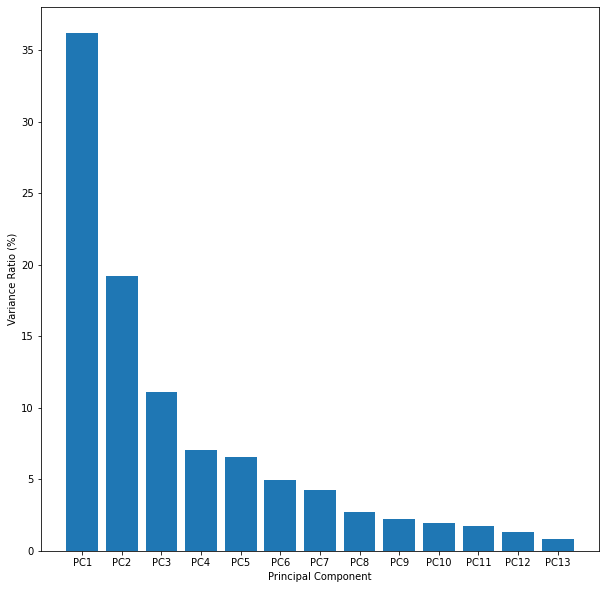

In [14]:
plt.figure(figsize=(10, 10))
plt.bar(x=x.columns.values, height=[100 * i for i in principal.explained_variance_ratio_])
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio (%)')

# Agglomerative Clustering

[Source](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

In [15]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

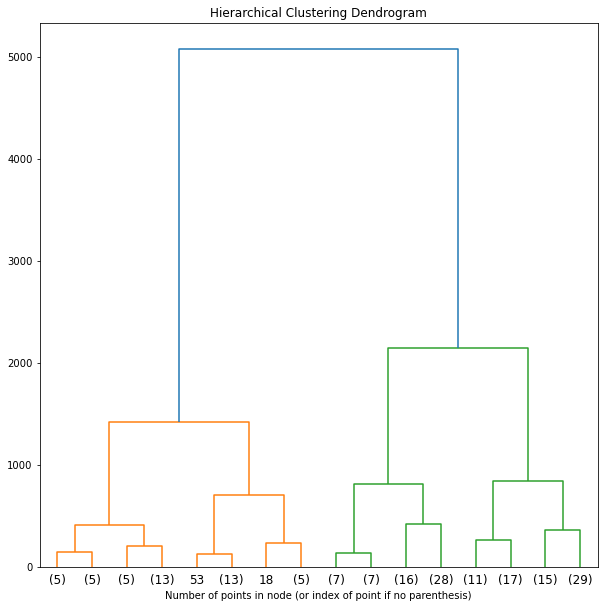

In [16]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df)

plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.show()

# K-Means

[Source](https://thatascience.com/learn-machine-learning/k-means/)

In [17]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(df)

Text(0, 0.5, 'PC2')

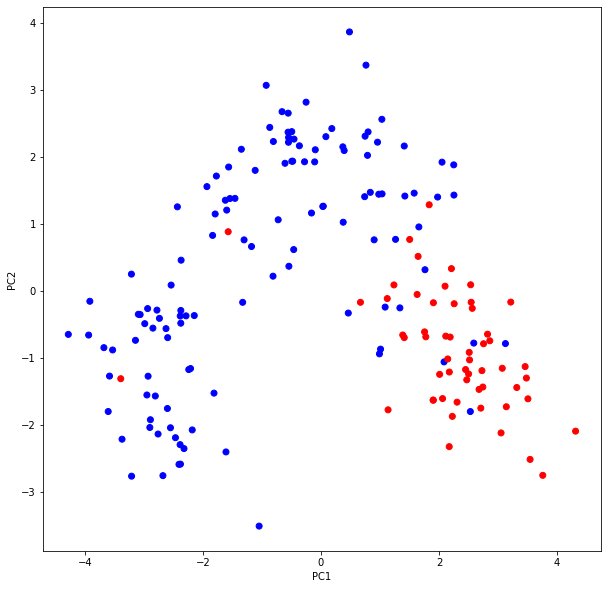

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(x['PC1'], x['PC2'], c=clusters, cmap='bwr')
plt.xlabel('PC1')
plt.ylabel('PC2')

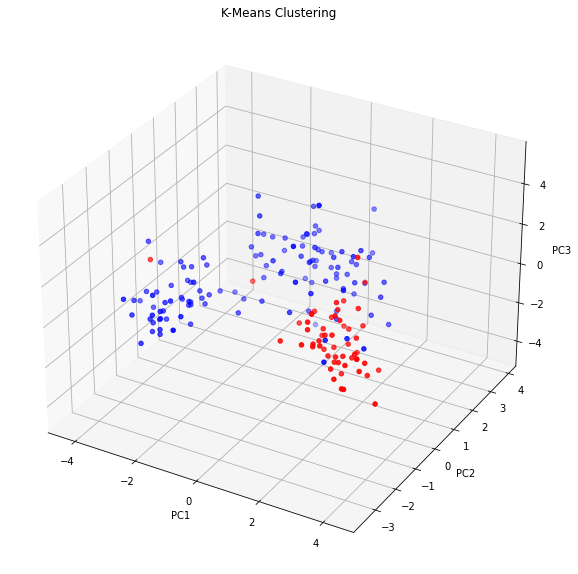

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x['PC1'], x['PC2'], x['PC3'], c=clusters, cmap='bwr')

ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()